This project aims to predict district-level GDP for Karnataka using time series data from 2013 to 2017 for model training, with the goal of forecasting GDP for the year 2018 across all districts. The dataset comprises nine key features for each district, including metrics such as night-time light (NTL) intensity, population, urbanization, and pollution indicators (PM2.5), along with the GDP as the target variable.

In [105]:
import pandas as pd

# Load the training dataset
train_df = pd.read_csv('/content/train_karnataka.csv')

# Display the first few rows and basic info
print(train_df.head())
print("\nData shape:", train_df.shape)
print("\nData info:")
print(train_df.info())
print("\nSummary statistics:")
print(train_df.describe())


   year   output  District_Number district_name      NTL_Sum  NTL_Mean  \
0  2013  1158730                1      BAGALKOT  15821.98725  0.494568   
1  2014  1708140                1      BAGALKOT  15190.49159  0.474828   
2  2015  2257551                1      BAGALKOT  19188.57898  0.599801   
3  2016  2806961                1      BAGALKOT  17223.69851  0.538383   
4  2017  3363371                1      BAGALKOT  23532.23151  0.735576   

   Population  Urbanisation  Urban_Population  Rural_Population   pm25_min  \
0     1923051     32.425477     623558.461896      1.299493e+06  18.100000   
1     1939608     32.818216     636544.736613      1.303063e+06  21.900000   
2     1956119     33.210954     649645.785737      1.306473e+06  19.299999   
3     1972604     33.595511     662706.388517      1.309898e+06  15.400000   
4     1985829     33.988249     674948.510970      1.310880e+06  17.600000   

    pm25_max  pm25_mean  pm25_num_cells  
0  35.000000  28.621898     5562.997255  
1 

let us do the data exploration part (EDA)

In [106]:
# Assuming train_df is already loaded as shown earlier
print("Columns in train_karnataka.csv:")
print(train_df.columns)

Columns in train_karnataka.csv:
Index(['year', 'output', 'District_Number', 'district_name', 'NTL_Sum',
       'NTL_Mean', 'Population', 'Urbanisation', 'Urban_Population',
       'Rural_Population', 'pm25_min', 'pm25_max', 'pm25_mean',
       'pm25_num_cells'],
      dtype='object')


here the output column is gdp of the districts we will rename it as GDDP(gross district domestic product)

In [107]:
import pandas as pd

# Load the training data
train_df = pd.read_csv('train_karnataka.csv')

# Rename the 'output' column to 'GDDP'
train_df = train_df.rename(columns={'output': 'GDDP'})

# Optionally, save the updated DataFrame back to CSV if needed
# train_df.to_csv('train_karnataka_renamed.csv', index=False)

print(train_df.columns)

Index(['year', 'GDDP', 'District_Number', 'district_name', 'NTL_Sum',
       'NTL_Mean', 'Population', 'Urbanisation', 'Urban_Population',
       'Rural_Population', 'pm25_min', 'pm25_max', 'pm25_mean',
       'pm25_num_cells'],
      dtype='object')


Visualizing Trends and Patterns: GDDP and Features Over Time

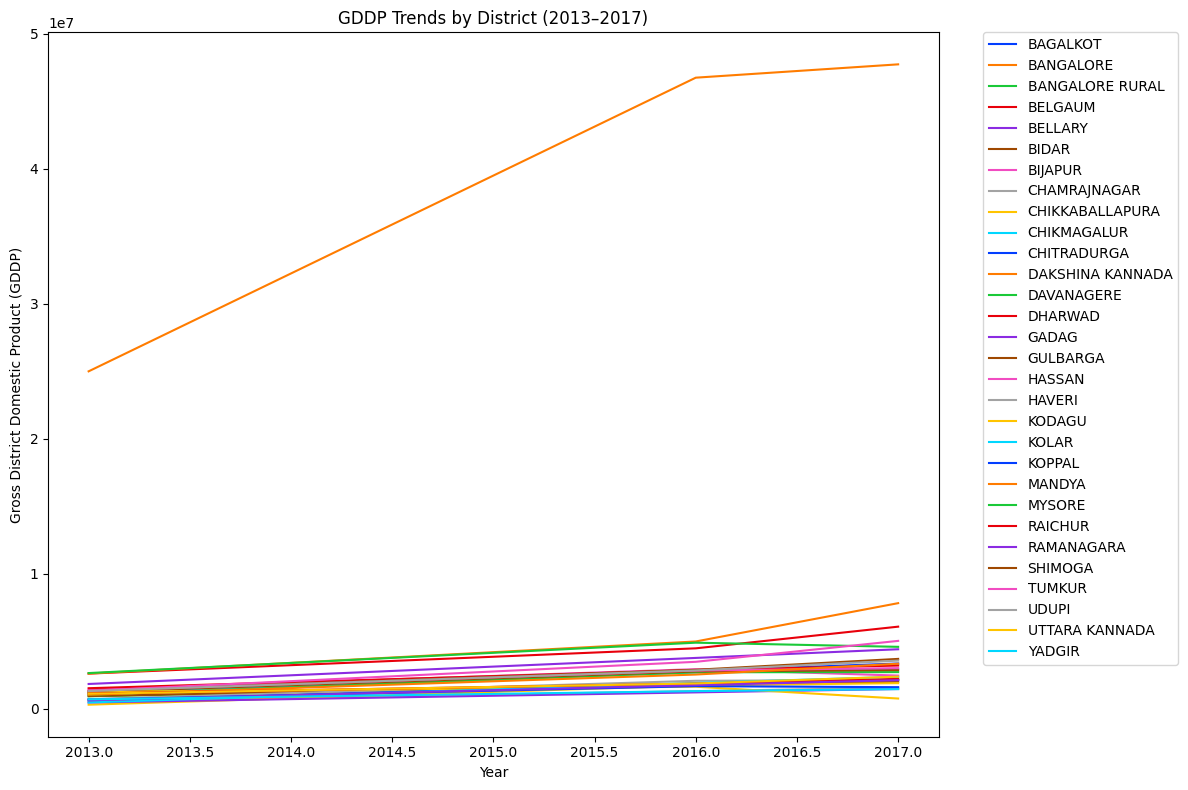

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rename 'output' to 'GDDP' if not already done
train_df = train_df.rename(columns={'output': 'GDDP'})

# Get the number of unique districts for palette size
n_districts = train_df['district_name'].nunique()

# Use a bright palette with enough colors for all districts
plt.figure(figsize=(12, 8))
sns.lineplot(
    x='year',
    y='GDDP',
    hue='district_name',
    data=train_df,
    palette=sns.color_palette("bright", n_colors=n_districts)
)
plt.title('GDDP Trends by District (2013–2017)')
plt.xlabel('Year')
plt.ylabel('Gross District Domestic Product (GDDP)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

as we can see the trends in gddp for bangalore are very high as compared to the other district

gddp trends of every district in a specific year

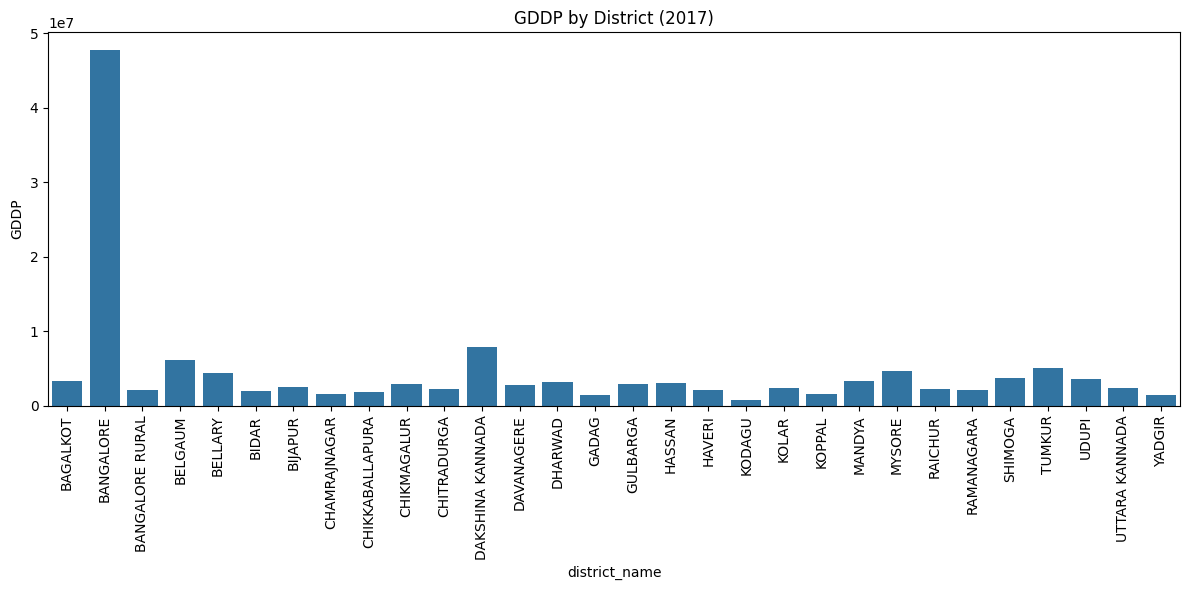

In [109]:
plt.figure(figsize=(12, 6))
sns.barplot(x='district_name', y='GDDP', data=train_df[train_df['year'] == 2017])
plt.title('GDDP by District (2017)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Heatmap: Correlation Between Features

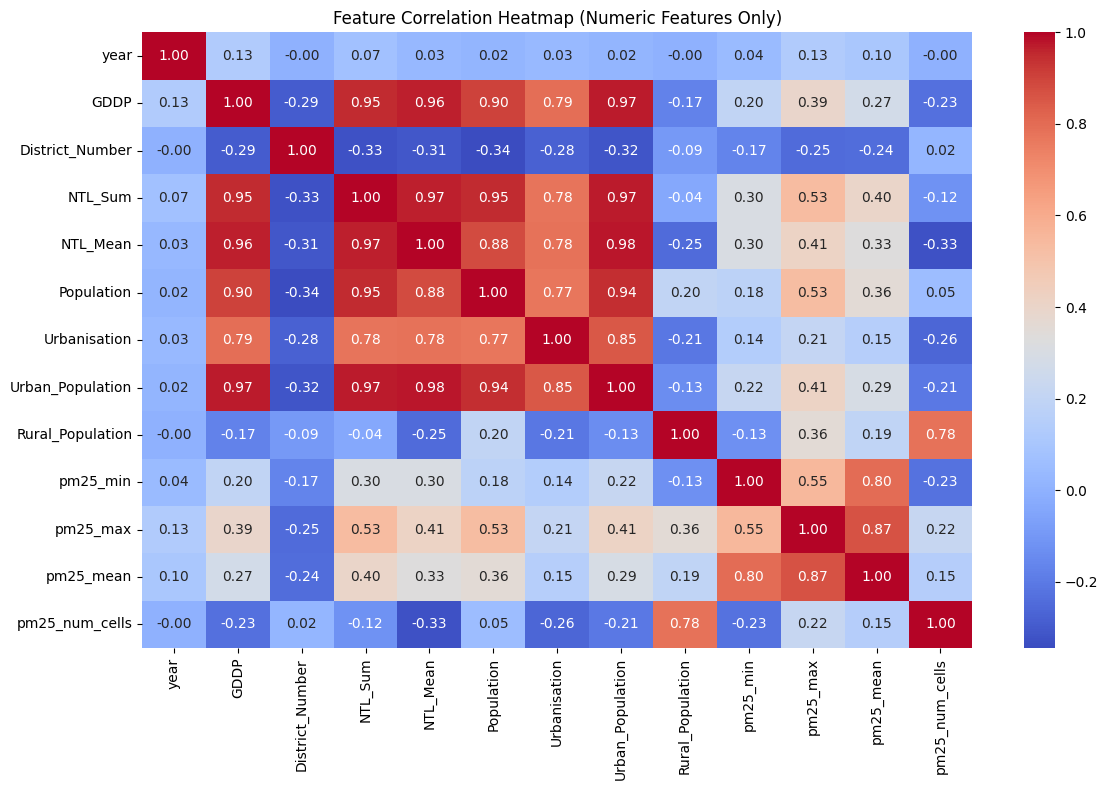

In [110]:
plt.figure(figsize=(12, 8))

# Select only numeric columns for correlation
numeric_cols = train_df.select_dtypes(include=['number']).columns
sns.heatmap(train_df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Feature Correlation Heatmap (Numeric Features Only)')
plt.tight_layout()
plt.show()

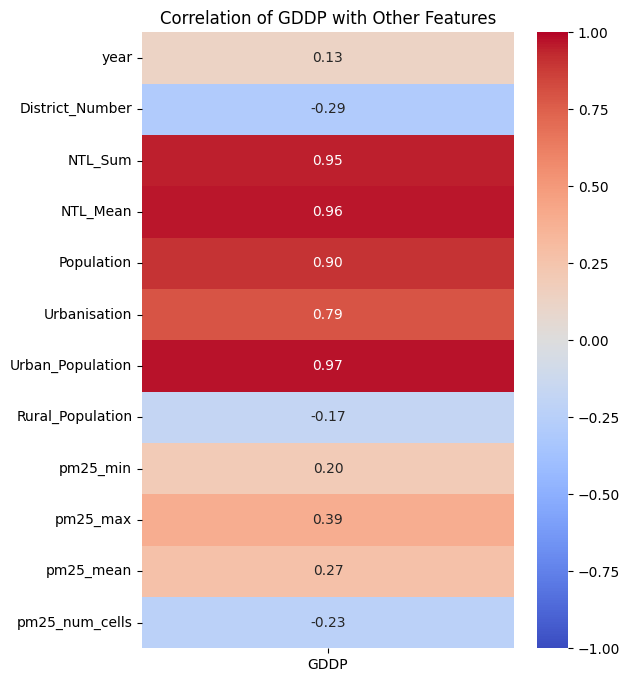

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_cols = train_df.select_dtypes(include=['number']).columns
corr = train_df[numeric_cols].corr()

# Extract only GDDP's correlation with all other features (as a DataFrame for heatmap)
gddp_corr = corr[['GDDP']].drop('GDDP')

# Plot heatmap for correlation of GDDP with other features
plt.figure(figsize=(6, 8))
sns.heatmap(gddp_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, fmt='.2f')
plt.title('Correlation of GDDP with Other Features')
plt.show()

In [112]:
# Check for missing values in train_df
missing_values = train_df.isnull().sum()
print(missing_values[missing_values > 0])

pm25_min          5
pm25_max          5
pm25_mean         5
pm25_num_cells    5
dtype: int64


5 missing values lets check for many district we have missing values

In [113]:
# Find which districts have missing values in any column
missing_by_district = train_df[train_df.isnull().any(axis=1)].groupby('district_name').size()
print(missing_by_district)

district_name
CHAMRAJNAGAR    5
dtype: int64


only one district have all the missing values so we wil drop this district in the furthur analysis

In [114]:
# Drop all rows for the district 'CHAMRAJNAGAR'
train_df = train_df[train_df['district_name'] != 'CHAMRAJNAGAR']

# Verify that 'CHAMRAJNAGAR' is no longer present
print(train_df['district_name'].unique())

['BAGALKOT' 'BANGALORE' 'BANGALORE RURAL' 'BELGAUM' 'BELLARY' 'BIDAR'
 'BIJAPUR' 'CHIKKABALLAPURA' 'CHIKMAGALUR' 'CHITRADURGA'
 'DAKSHINA KANNADA' 'DAVANAGERE' 'DHARWAD' 'GADAG' 'GULBARGA' 'HASSAN'
 'HAVERI' 'KODAGU' 'KOLAR' 'KOPPAL' 'MANDYA' 'MYSORE' 'RAICHUR'
 'RAMANAGARA' 'SHIMOGA' 'TUMKUR' 'UDUPI' 'UTTARA KANNADA' 'YADGIR']


In [115]:
train_df.head()

,year,GDDP,District_Number,district_name,NTL_Sum,NTL_Mean,Population,Urbanisation,Urban_Population,Rural_Population,pm25_min,pm25_max,pm25_mean,pm25_num_cells
0,2013,1158730,1,BAGALKOT,15821.98725,0.494568,1923051,32.425477,623558.461896,1.299493e+06,18.100000,35.000000,28.621898,5562.997255
1,2014,1708140,1,BAGALKOT,15190.49159,0.474828,1939608,32.818216,636544.736613,1.303063e+06,21.900000,39.299999,32.640449,5562.997255
2,2015,2257551,1,BAGALKOT,19188.57898,0.599801,1956119,33.210954,649645.785737,1.306473e+06,19.299999,37.400002,30.211687,5562.997255
3,2016,2806961,1,BAGALKOT,17223.69851,0.538383,1972604,33.595511,662706.388517,1.309898e+06,15.400000,37.599998,28.865273,5562.997255
4,2017,3363371,1,BAGALKOT,23532.23151,0.735576,1985829,33.988249,674948.510970,1.310880e+06,17.600000,39.799999,32.529358,5562.997255


now we will model it for basic ml algorithms to get insights how they perform

let us also do that with out test file

In [116]:
import pandas as pd

# Load the test dataset
test_df = pd.read_csv('test_karnataka.csv')

# Remove all rows for the district 'CHAMRAJNAGAR'
test_df = test_df[test_df['district_name'] != 'CHAMRAJNAGAR']

# Rename 'output' column to 'GDDP' if not already done
test_df = test_df.rename(columns={'output': 'GDDP'})

# Display unique districts to confirm removal
print("Unique districts in test set after removal:")
print(test_df['district_name'].unique())

Unique districts in test set after removal:
['BAGALKOT' 'BANGALORE' 'BANGALORE RURAL' 'BELGAUM' 'BELLARY' 'BIDAR'
 'BIJAPUR' 'CHIKKABALLAPURA' 'CHIKMAGALUR' 'CHITRADURGA'
 'DAKSHINA KANNADA' 'DAVANAGERE' 'DHARWAD' 'GADAG' 'GULBARGA' 'HASSAN'
 'HAVERI' 'KODAGU' 'KOLAR' 'KOPPAL' 'MANDYA' 'MYSORE' 'RAICHUR'
 'RAMANAGARA' 'SHIMOGA' 'TUMKUR' 'UDUPI' 'UTTARA KANNADA' 'YADGIR']


Define Features and Target

In [117]:
features = ['NTL_Sum', 'NTL_Mean', 'Population', 'Urbanisation',
            'Urban_Population', 'Rural_Population', 'pm25_min',
            'pm25_max', 'pm25_mean', 'pm25_num_cells']

X_train = train_df[features]
y_train = train_df['GDDP']

X_test = test_df[features]
y_test = test_df['GDDP']

In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [119]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and fit model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled if 'X_train_scaled' in locals() else X_train, y_train)

# Predict and evaluate on test set
test_pred = rf.predict(X_test_scaled if 'X_test_scaled' in locals() else X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
test_r2 = r2_score(y_test, test_pred)

print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test R²: {test_r2:.2f}")

Test RMSE: 2167782.58
Test R²: 0.95


In [120]:
results = test_df[['district_name', 'year', 'GDDP']].copy()
results['Predicted_GDDP'] = test_pred
results['Percentage_Error'] = np.abs((results['GDDP'] - results['Predicted_GDDP']) / results['GDDP']) * 100
results = results.rename(columns={'GDDP': 'Actual_GDDP'})
results.to_csv('district_gddp_predictions_with_error.csv', index=False)

The model explains 95% of the variance in GDDP, indicating it captures most of the underlying patterns in your Karnataka district-level data.

This suggests strong relationships between your input features (e.g., NTL_Mean, Urban_Population) and GDDP.
the reason for high rmse is because the gddp values are in milions so this is not a problem

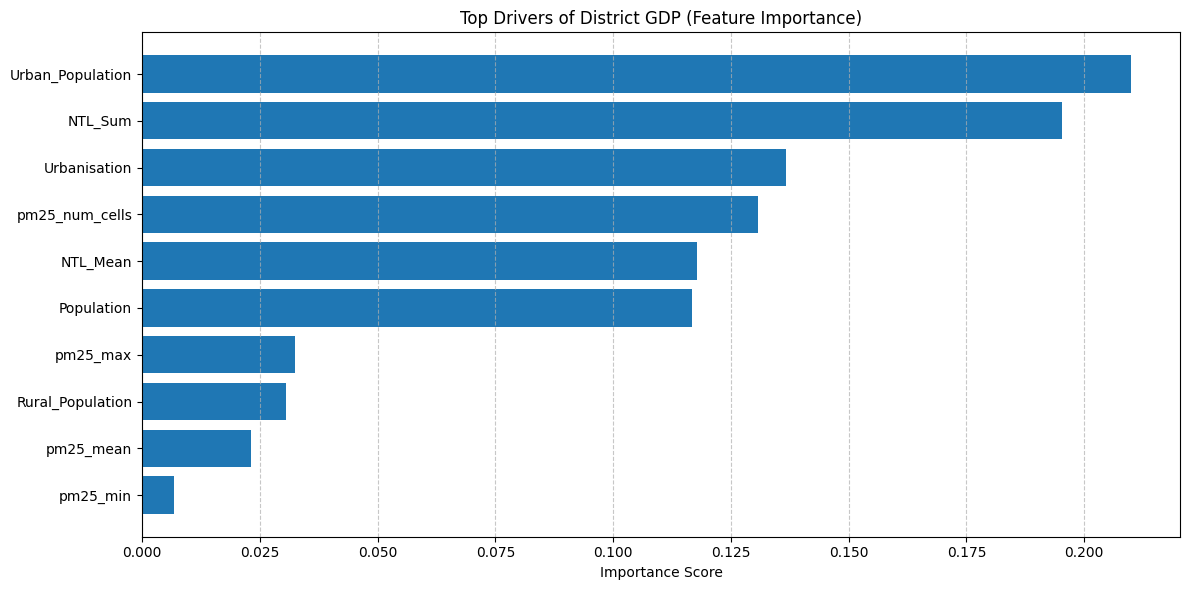

In [121]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf.feature_importances_
feature_names = X_train.columns

# Sort and plot
sorted_idx = importances.argsort()
plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center', color='#1f77b4')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.title('Top Drivers of District GDP (Feature Importance)')
plt.xlabel('Importance Score')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

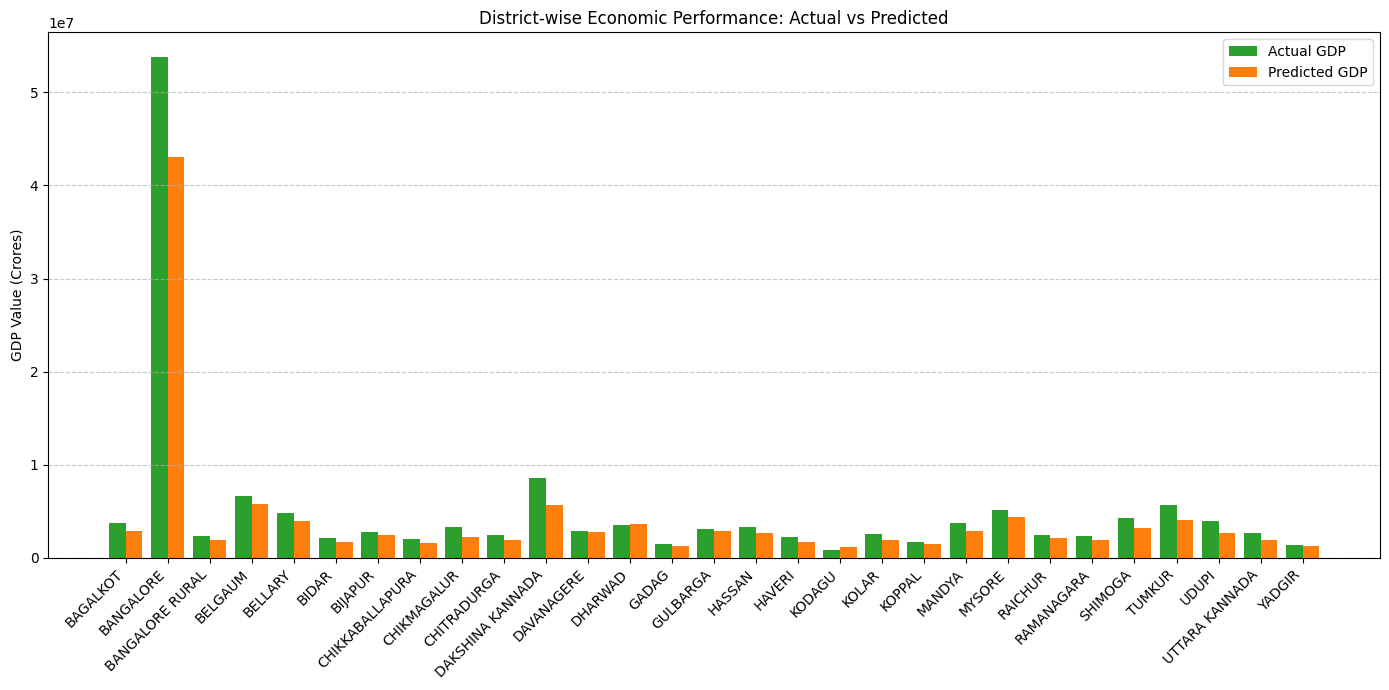

In [122]:
plt.figure(figsize=(14, 7))
x = np.arange(len(results))
plt.bar(x - 0.2, results['Actual_GDDP'], width=0.4, label='Actual GDP', color='#2ca02c')
plt.bar(x + 0.2, results['Predicted_GDDP'], width=0.4, label='Predicted GDP', color='#ff7f0e')

plt.xticks(x, results['district_name'], rotation=45, ha='right')
plt.ylabel('GDP Value (Crores)')
plt.title('District-wise Economic Performance: Actual vs Predicted')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

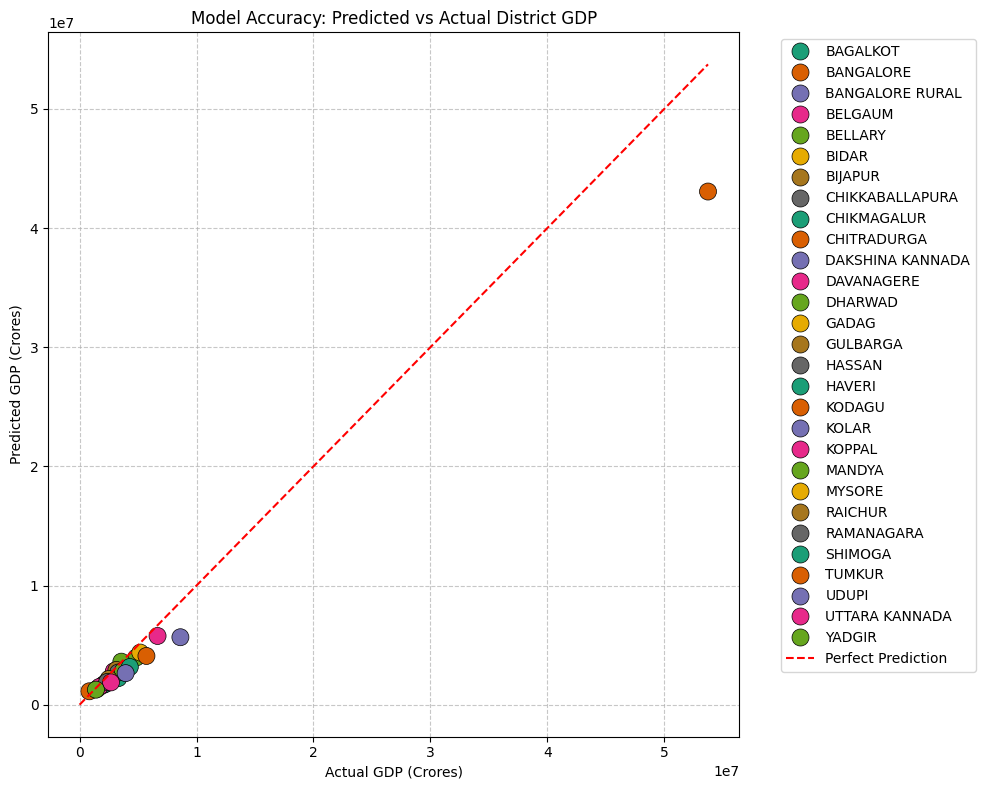

In [123]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x='Actual_GDDP', y='Predicted_GDDP', data=results,
                    hue='district_name', palette='Dark2', s=150,
                    edgecolor='black', linewidth=0.5)

max_val = max(results[['Actual_GDDP', 'Predicted_GDDP']].max().tolist() + [0])
plt.plot([0, max_val], [0, max_val], 'r--', label='Perfect Prediction')

plt.xlabel('Actual GDP (Crores)')
plt.ylabel('Predicted GDP (Crores)')
plt.title('Model Accuracy: Predicted vs Actual District GDP')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

NOW WE WILL TRY XGBOOST AND CHECK IF WE CAN GET BETTER PREDICTION

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Features and target (already defined in your environment)
features = ['NTL_Sum', 'NTL_Mean', 'Population', 'Urbanisation',
            'Urban_Population', 'Rural_Population', 'pm25_min',
            'pm25_max', 'pm25_mean', 'pm25_num_cells']
target = 'GDDP'

# Temporal split (2013-2017 for training, 2018 for testing)
X_train = train_df[train_df['year'] <= 2017][features]
y_train = train_df[train_df['year'] <= 2017][target]

X_test = test_df[features]
y_test = test_df[target]

In [125]:
from xgboost import XGBRegressor

# Initialize and train model
xgb = XGBRegressor(
    n_estimators=1000,  # Use more trees for better convergence
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [126]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

test_pred = xgb.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
test_r2 = r2_score(y_test, test_pred)

print(f"XGBoost Test RMSE: {test_rmse:.2f}")
print(f"XGBoost Test R²: {test_r2:.2f}")

XGBoost Test RMSE: 1450454.34
XGBoost Test R²: 0.98


In [136]:
import numpy as np

# Create results DataFrame
results = test_df[['district_name', 'year', 'GDDP']].copy()
results['Predicted_GDDP'] = test_pred  # Predicted values from XGBoost
results['Percentage_Error'] = np.abs((results['GDDP'] - results['Predicted_GDDP']) / results['GDDP']) * 100

# Rename columns for clarity
results = results.rename(columns={'GDDP': 'Actual_GDDP'})

# Save to CSV
results.to_csv('xgboost_district_gddp_predictions_with_error.csv', index=False)

# Display sample output
print(results.head())

     district_name  year  Actual_GDDP  Predicted_GDDP  Percentage_Error
0         BAGALKOT  2018      3711497    2.621315e+06         29.373101
1        BANGALORE  2018     53745884    4.674991e+07         13.016759
2  BANGALORE RURAL  2018      2368917    1.800963e+06         23.975265
3          BELGAUM  2018      6669748    6.376400e+06          4.398180
4          BELLARY  2018      4841015    5.312474e+06          9.738856


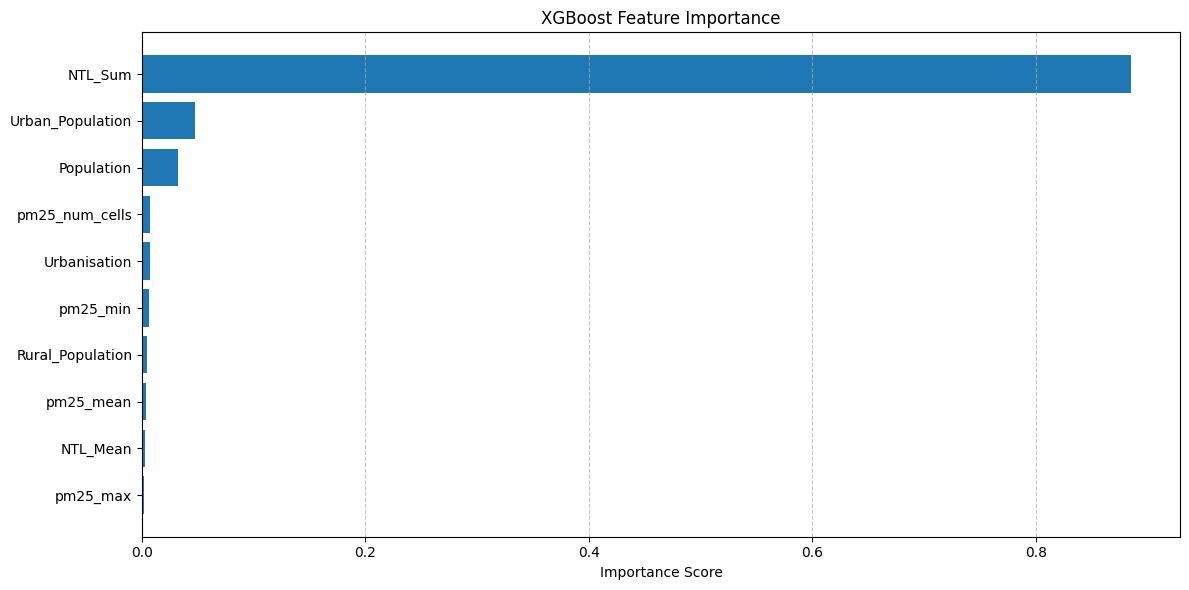

In [128]:
import matplotlib.pyplot as plt

# Get and sort feature importances
importances = xgb.feature_importances_
sorted_idx = np.argsort(importances)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center', color='#1f77b4')
plt.yticks(range(len(sorted_idx)), np.array(features)[sorted_idx])
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance Score')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

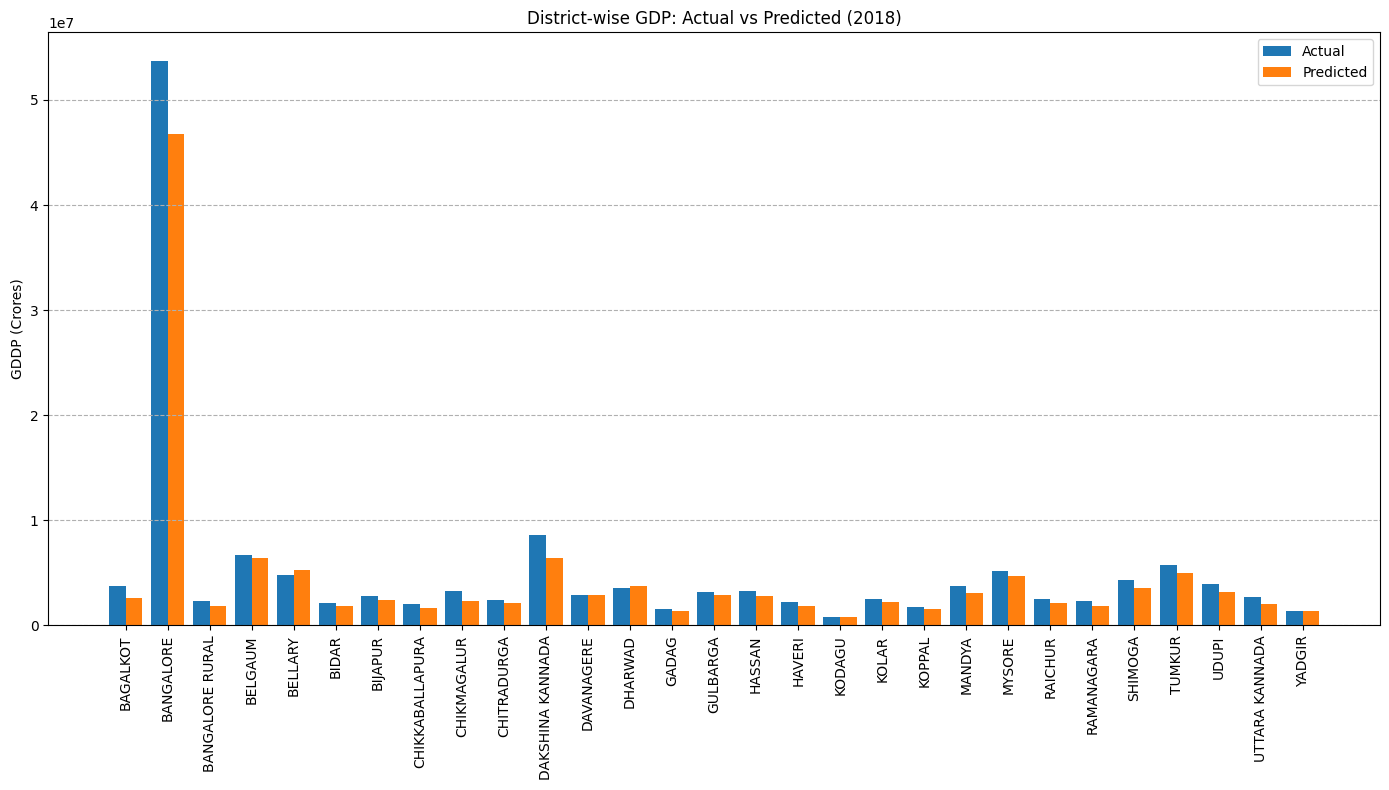

In [129]:
# Create results DataFrame
results = test_df[['district_name', 'year', 'GDDP']].copy()
results['Predicted_GDDP'] = test_pred
results = results.rename(columns={'GDDP': 'Actual_GDDP'})

# Plot
plt.figure(figsize=(14, 8))
results_sorted = results.sort_values('district_name')
x = np.arange(len(results_sorted))

plt.bar(x - 0.2, results_sorted['Actual_GDDP'], width=0.4, label='Actual')
plt.bar(x + 0.2, results_sorted['Predicted_GDDP'], width=0.4, label='Predicted')

plt.xticks(x, results_sorted['district_name'], rotation=90)
plt.ylabel('GDDP (Crores)')
plt.title('District-wise GDP: Actual vs Predicted (2018)')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

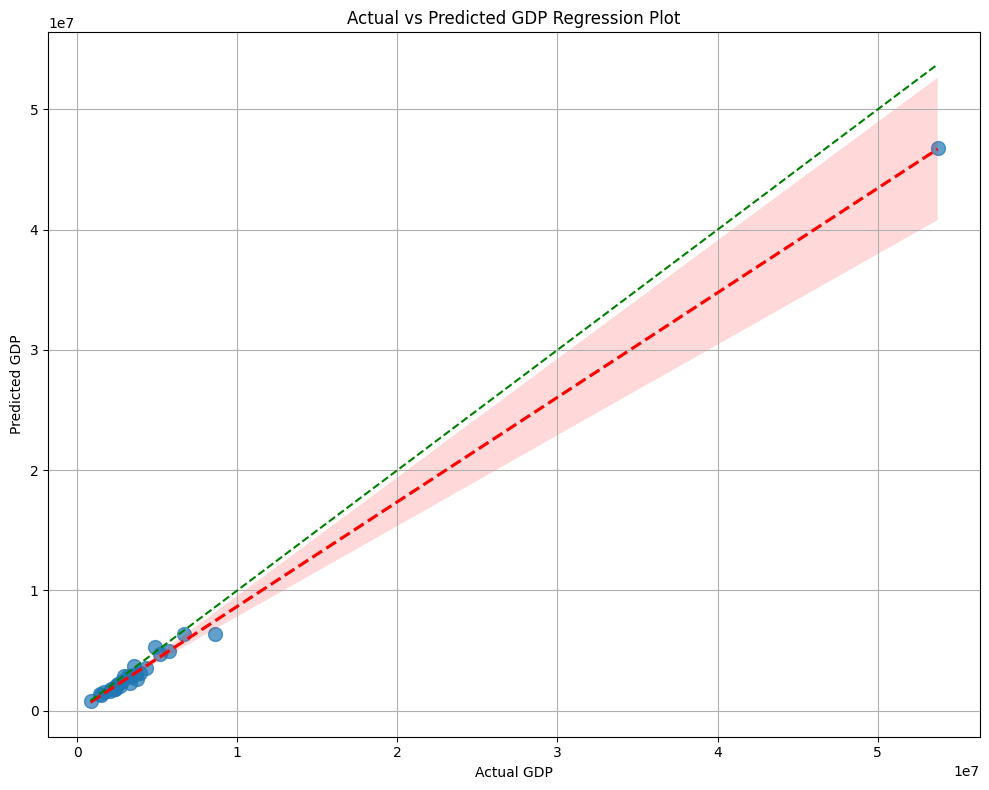

In [130]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.regplot(x='Actual_GDDP', y='Predicted_GDDP', data=results,
            scatter_kws={'s':100, 'alpha':0.7},
            line_kws={'color':'red', 'linestyle':'--'})
plt.plot([results['Actual_GDDP'].min(), results['Actual_GDDP'].max()],
         [results['Actual_GDDP'].min(), results['Actual_GDDP'].max()],
         'g--')
plt.title('Actual vs Predicted GDP Regression Plot')
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.grid(True)
plt.tight_layout()
plt.show()

Randomly selected districts: ['UTTARA KANNADA', 'HAVERI', 'DHARWAD', 'RAICHUR', 'CHIKMAGALUR', 'CHITRADURGA', 'MYSORE', 'BAGALKOT', 'UDUPI', 'GADAG']


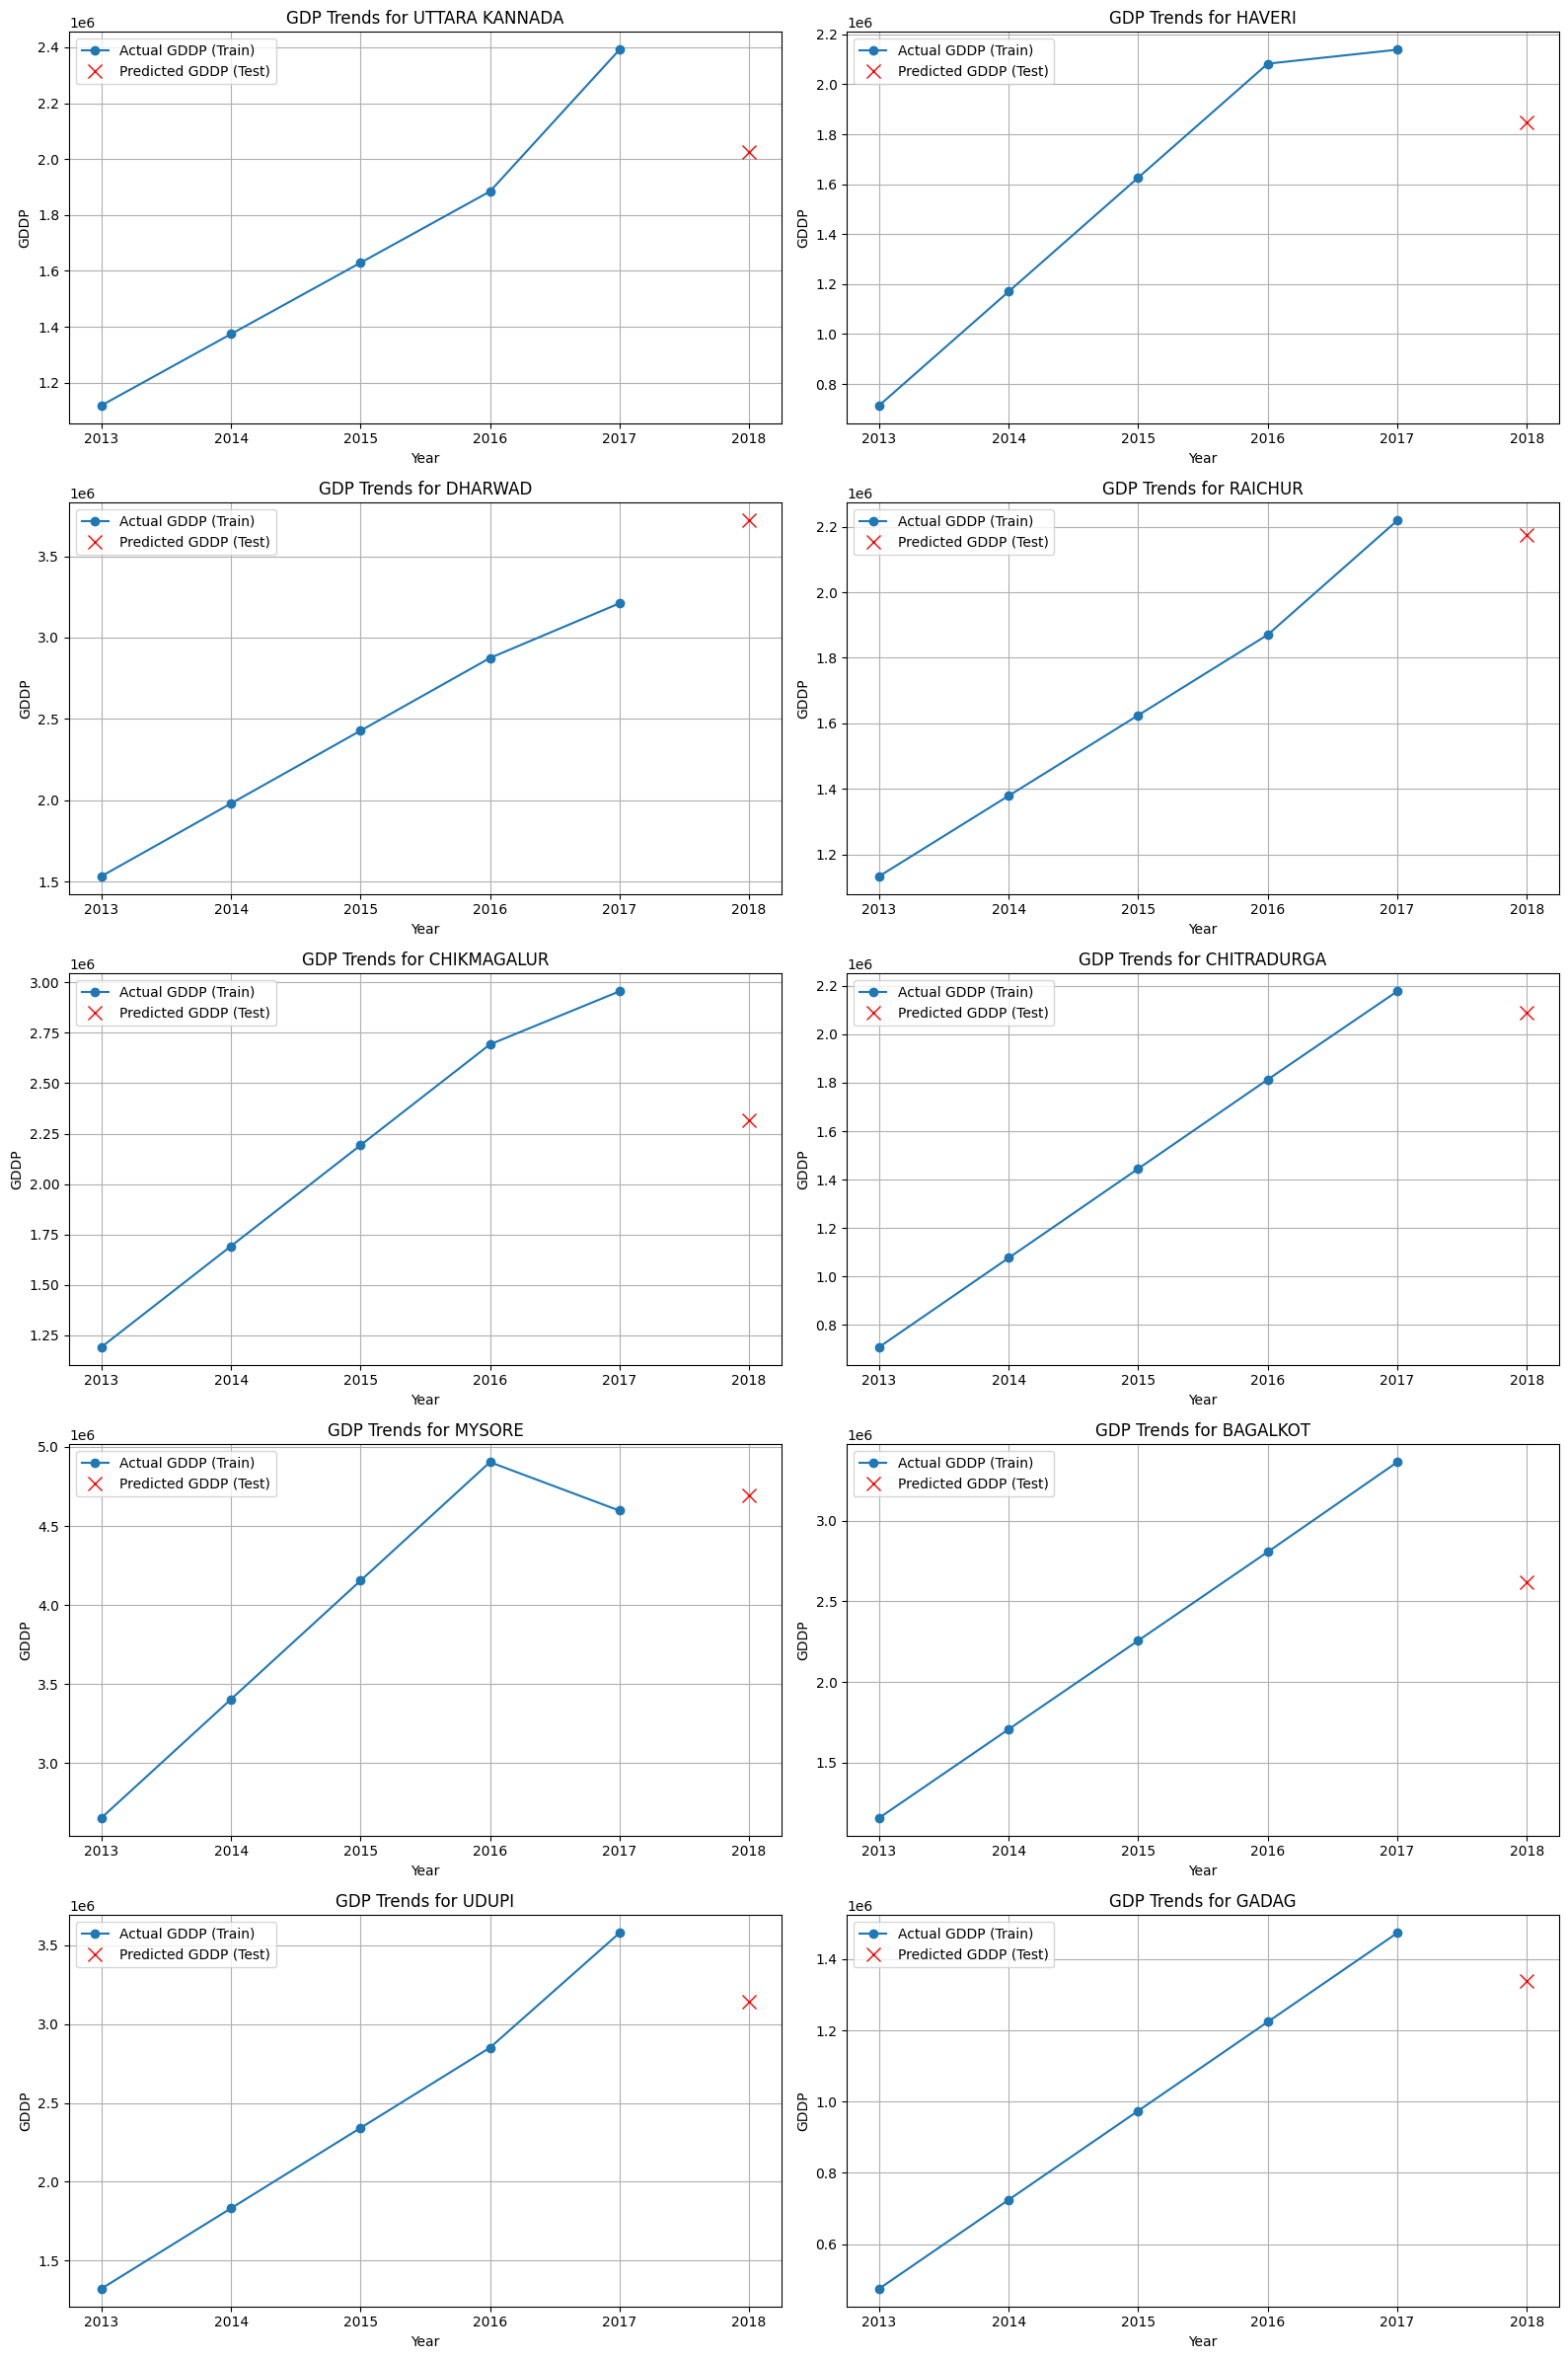

In [135]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Randomly select 10 unique districts
np.random.seed(42)  # For reproducibility
districts = results['district_name'].unique()
random_districts = np.random.choice(districts, size=10, replace=False)

print("Randomly selected districts:", random_districts.tolist())

# 2. Plot for each selected district
fig, axes = plt.subplots(5, 2, figsize=(16, 24))
axes = axes.flatten()

for i, district in enumerate(random_districts):
    ax = axes[i]
    # Historical data (actual)
    hist_data = train_df[train_df['district_name'] == district]
    # Test year prediction
    pred_data = results[results['district_name'] == district]

    # Plot actual GDDP over years
    ax.plot(hist_data['year'], hist_data['GDDP'], marker='o', label='Actual GDDP (Train)')
    # Plot predicted GDDP for test year
    ax.plot(pred_data['year'], pred_data['Predicted_GDDP'], marker='x', markersize=10, linestyle='None', color='red', label='Predicted GDDP (Test)')

    ax.set_title(f'GDP Trends for {district}')
    ax.set_xlabel('Year')
    ax.set_ylabel('GDDP')
    ax.legend()
    ax.grid(True)

# Hide any unused subplots if less than 10 districts
for j in range(len(random_districts), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

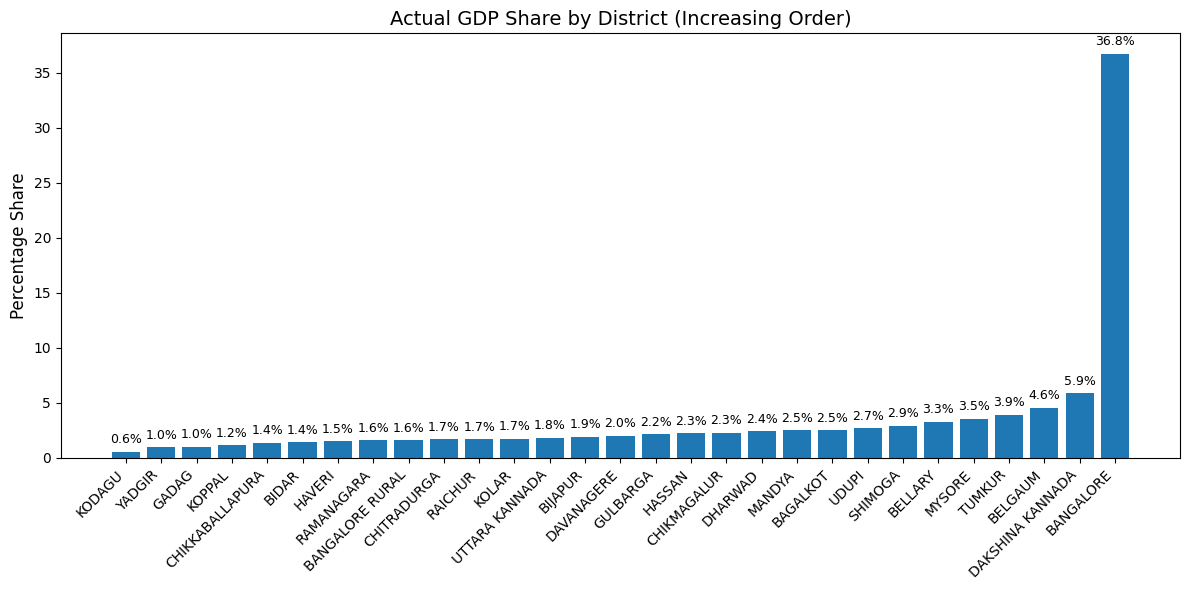

In [132]:
import matplotlib.pyplot as plt

# Calculate actual GDP shares and sort ascending
actual_total = test_df['GDDP'].sum()
actual_shares = test_df.groupby('district_name')['GDDP'].sum() / actual_total * 100
actual_shares = actual_shares.sort_values().reset_index(name='Percent_Share')

# Plot actual GDP share
plt.figure(figsize=(12, 6))
bars = plt.bar(actual_shares['district_name'], actual_shares['Percent_Share'], color='#1f77b4')
plt.title('Actual GDP Share by District (Increasing Order)', fontsize=14)
plt.ylabel('Percentage Share', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 0.5,
             f'{height:.1f}%',
             ha='center',
             va='bottom',
             fontsize=9)

plt.tight_layout()
plt.show()

In [138]:
# Add predictions to test_df FIRST
test_df['Predicted_GDDP'] = test_pred  # <-- Critical missing step

# Then calculate shares
predicted_total = test_df['Predicted_GDDP'].sum()
predicted_shares = test_df.groupby('district_name')['Predicted_GDDP'].sum() / predicted_total * 100
predicted_shares = predicted_shares.sort_values().reset_index(name='Percent_Share')

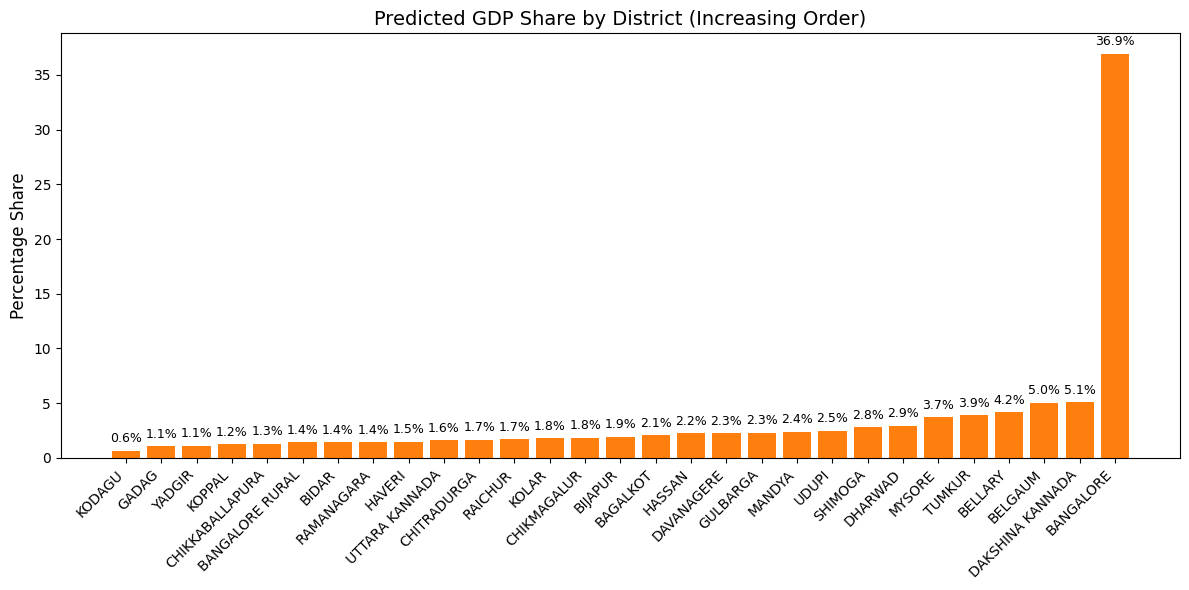

In [139]:
# Calculate predicted GDP shares and sort ascending
predicted_total = test_df['Predicted_GDDP'].sum()
predicted_shares = test_df.groupby('district_name')['Predicted_GDDP'].sum() / predicted_total * 100
predicted_shares = predicted_shares.sort_values().reset_index(name='Percent_Share')

# Plot predicted GDP share
plt.figure(figsize=(12, 6))
bars = plt.bar(predicted_shares['district_name'], predicted_shares['Percent_Share'], color='#ff7f0e')
plt.title('Predicted GDP Share by District (Increasing Order)', fontsize=14)
plt.ylabel('Percentage Share', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 0.5,
             f'{height:.1f}%',
             ha='center',
             va='bottom',
             fontsize=9)

plt.tight_layout()
plt.show()

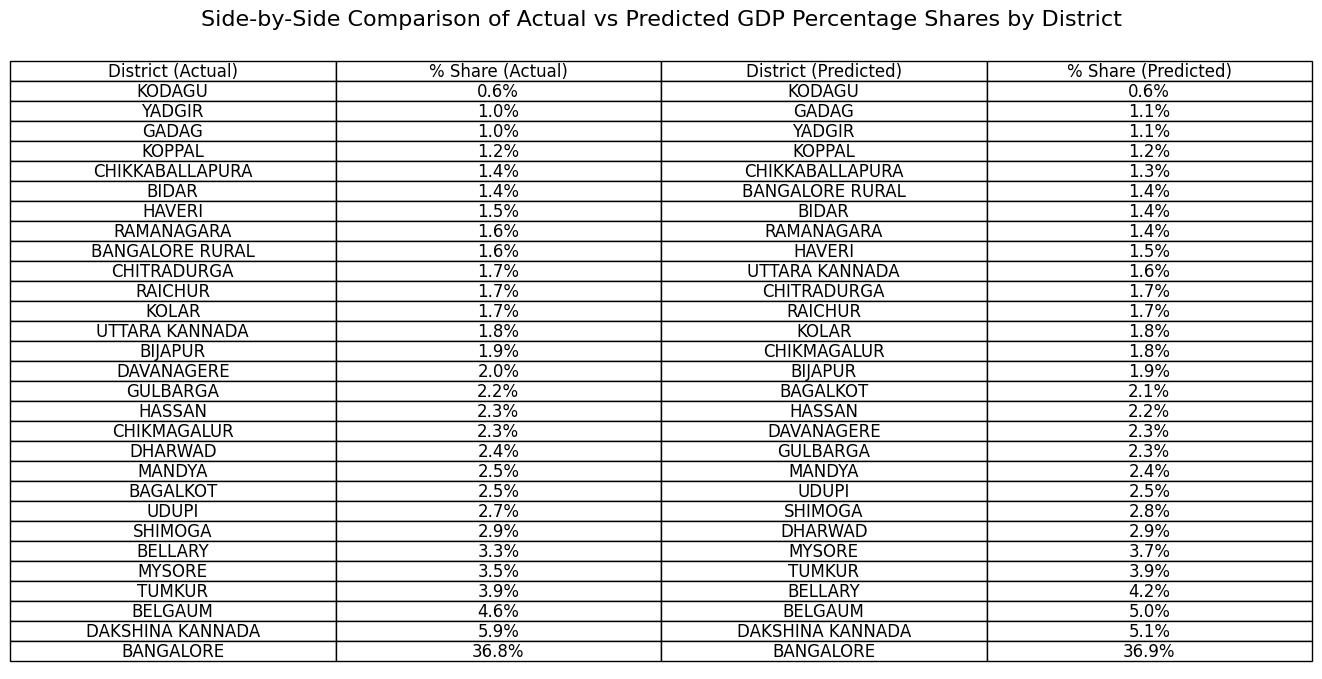

In [140]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate percentage shares
actual_shares = test_df.groupby('district_name')['GDDP'].sum() / test_df['GDDP'].sum() * 100
predicted_shares = test_df.groupby('district_name')['Predicted_GDDP'].sum() / test_df['Predicted_GDDP'].sum() * 100

# Create sorted DataFrames
actual_sorted = pd.DataFrame({
    'District (Actual)': actual_shares.index,
    '% Share (Actual)': actual_shares.values
}).sort_values('% Share (Actual)').reset_index(drop=True)

predicted_sorted = pd.DataFrame({
    'District (Predicted)': predicted_shares.index,
    '% Share (Predicted)': predicted_shares.values
}).sort_values('% Share (Predicted)').reset_index(drop=True)

# Combine for side-by-side comparison
comparison_table = pd.concat([actual_sorted, predicted_sorted], axis=1)

# Format percentages
comparison_table['% Share (Actual)'] = comparison_table['% Share (Actual)'].apply(lambda x: f"{x:.1f}%")
comparison_table['% Share (Predicted)'] = comparison_table['% Share (Predicted)'].apply(lambda x: f"{x:.1f}%")

# Plotting diagram-style visualization
fig, ax = plt.subplots(figsize=(14, 8))
ax.axis('off')

# Create table plot
table = ax.table(cellText=comparison_table.values,
                 colLabels=comparison_table.columns,
                 cellLoc='center',
                 loc='center')

# Style adjustments
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.title('Side-by-Side Comparison of Actual vs Predicted GDP Percentage Shares by District', fontsize=16, pad=20)
plt.show()

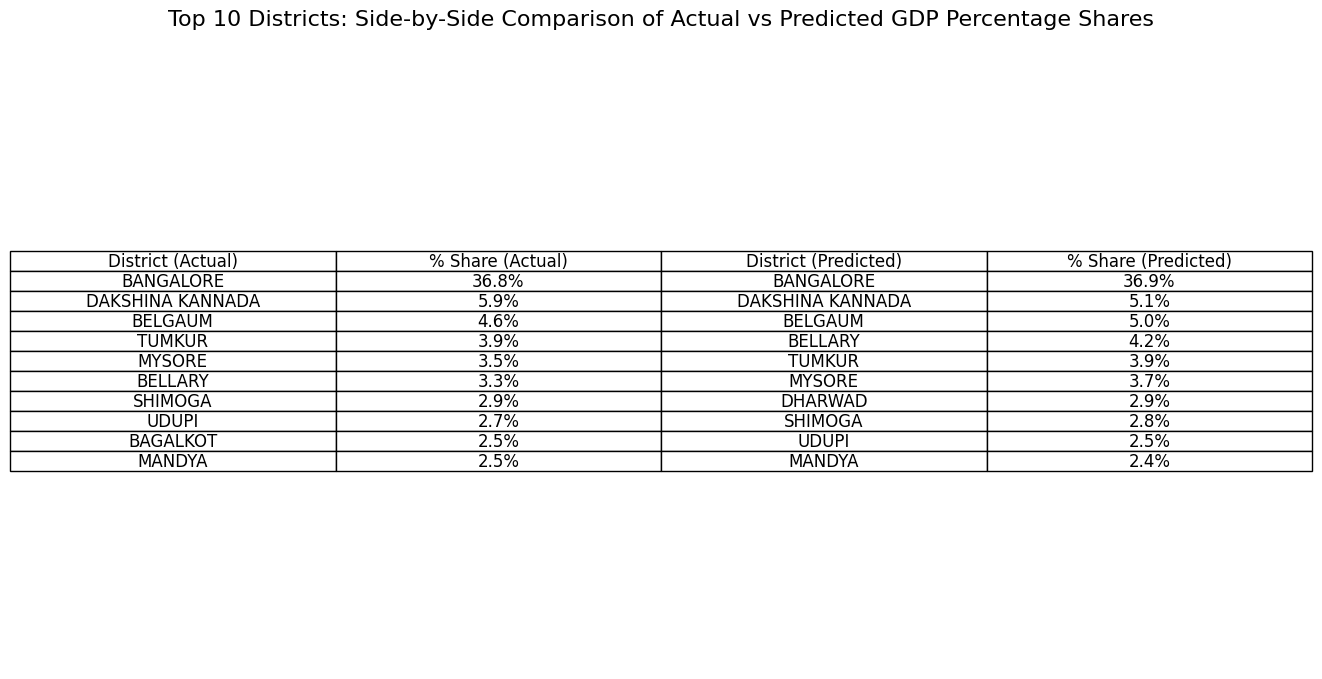

In [141]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate percentage shares
actual_shares = test_df.groupby('district_name')['GDDP'].sum() / test_df['GDDP'].sum() * 100
predicted_shares = test_df.groupby('district_name')['Predicted_GDDP'].sum() / test_df['Predicted_GDDP'].sum() * 100

# Get top 10 for actual and predicted
actual_top10 = actual_shares.sort_values(ascending=False).head(10)
predicted_top10 = predicted_shares.sort_values(ascending=False).head(10)

# Create sorted DataFrames
actual_sorted = pd.DataFrame({
    'District (Actual)': actual_top10.index,
    '% Share (Actual)': actual_top10.values
}).sort_values('% Share (Actual)', ascending=False).reset_index(drop=True)

predicted_sorted = pd.DataFrame({
    'District (Predicted)': predicted_top10.index,
    '% Share (Predicted)': predicted_top10.values
}).sort_values('% Share (Predicted)', ascending=False).reset_index(drop=True)

# Combine for side-by-side comparison
comparison_table = pd.concat([actual_sorted, predicted_sorted], axis=1)

# Format percentages
comparison_table['% Share (Actual)'] = comparison_table['% Share (Actual)'].apply(lambda x: f"{x:.1f}%")
comparison_table['% Share (Predicted)'] = comparison_table['% Share (Predicted)'].apply(lambda x: f"{x:.1f}%")

# Plotting diagram-style visualization
fig, ax = plt.subplots(figsize=(14, 8))
ax.axis('off')

# Create table plot
table = ax.table(cellText=comparison_table.values,
                 colLabels=comparison_table.columns,
                 cellLoc='center',
                 loc='center')

# Style adjustments
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.title('Top 10 Districts: Side-by-Side Comparison of Actual vs Predicted GDP Percentage Shares', fontsize=16, pad=20)
plt.show()

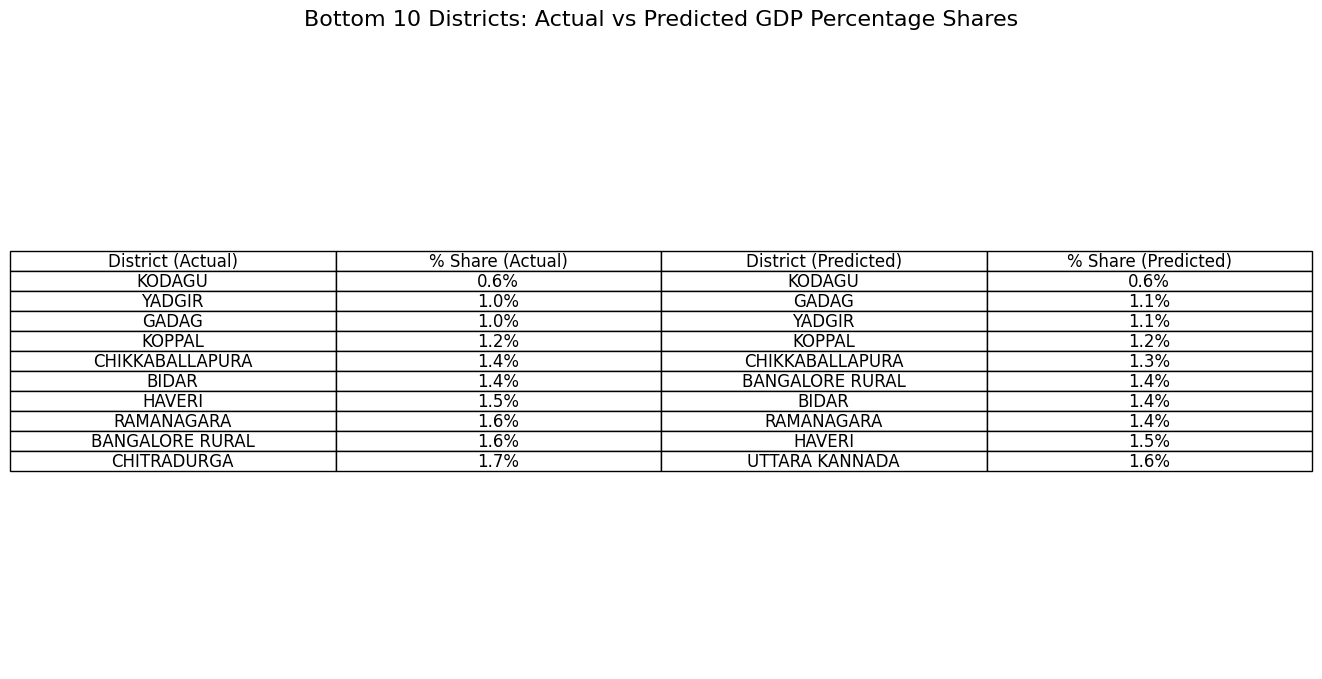

In [142]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure test_df is defined and contains required columns
# test_df = pd.read_csv('test_karnataka.csv')  # Example if not already loaded

# Calculate percentage shares
actual_shares = test_df.groupby('district_name')['GDDP'].sum() / test_df['GDDP'].sum() * 100
predicted_shares = test_df.groupby('district_name')['Predicted_GDDP'].sum() / test_df['Predicted_GDDP'].sum() * 100

# Get bottom 10 for actual and predicted
actual_bottom10 = actual_shares.sort_values(ascending=True).head(10)
predicted_bottom10 = predicted_shares.sort_values(ascending=True).head(10)

# Create sorted DataFrames for bottom 10
actual_bottom10_df = pd.DataFrame({
    'District (Actual)': actual_bottom10.index,
    '% Share (Actual)': actual_bottom10.values
}).sort_values('% Share (Actual)').reset_index(drop=True)

predicted_bottom10_df = pd.DataFrame({
    'District (Predicted)': predicted_bottom10.index,
    '% Share (Predicted)': predicted_bottom10.values
}).sort_values('% Share (Predicted)').reset_index(drop=True)

bottom10_comparison = pd.concat([actual_bottom10_df, predicted_bottom10_df], axis=1)
bottom10_comparison['% Share (Actual)'] = bottom10_comparison['% Share (Actual)'].apply(lambda x: f"{x:.1f}%")
bottom10_comparison['% Share (Predicted)'] = bottom10_comparison['% Share (Predicted)'].apply(lambda x: f"{x:.1f}%")

# Plotting diagram-style visualization for bottom 10
fig, ax = plt.subplots(figsize=(14, 8))
ax.axis('off')

table = ax.table(cellText=bottom10_comparison.values,
                 colLabels=bottom10_comparison.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.title('Bottom 10 Districts: Actual vs Predicted GDP Percentage Shares', fontsize=16, pad=20)
plt.show()

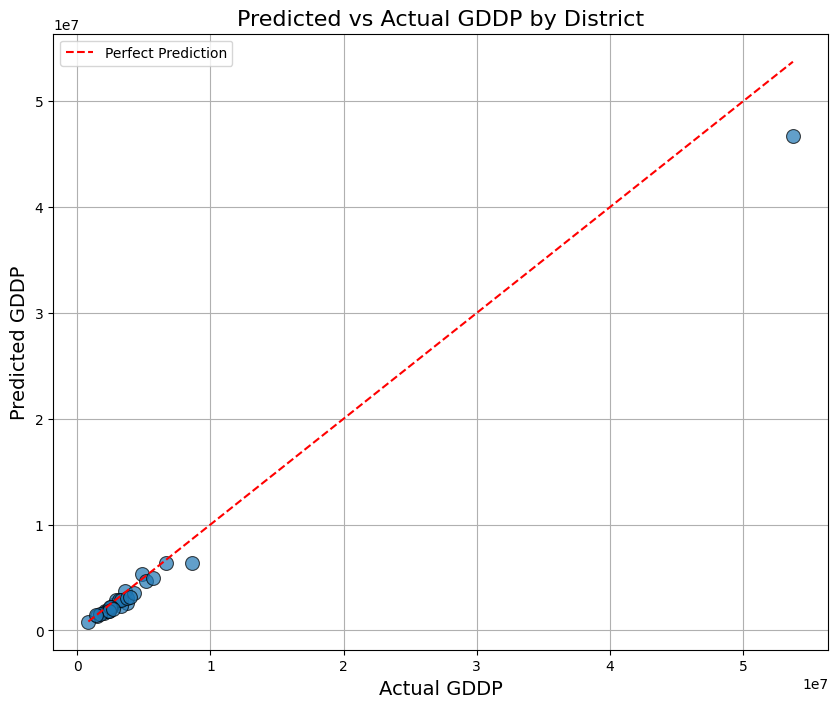

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='GDDP', y='Predicted_GDDP', data=test_df, s=100, alpha=0.7, color='#1f77b4', edgecolor='k')
plt.plot([test_df['GDDP'].min(), test_df['GDDP'].max()],
         [test_df['GDDP'].min(), test_df['GDDP'].max()],
         'r--', label='Perfect Prediction')
plt.title('Predicted vs Actual GDDP by District', fontsize=16)
plt.xlabel('Actual GDDP', fontsize=14)
plt.ylabel('Predicted GDDP', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

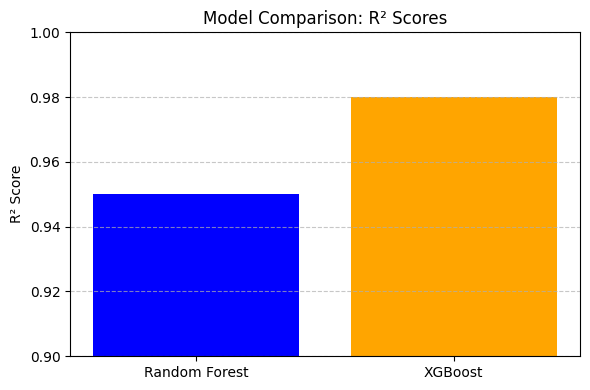

In [144]:
import matplotlib.pyplot as plt

# R² values
r2_rf = 0.95
r2_xgb = 0.98

# Plot
plt.figure(figsize=(6, 4))
plt.bar(['Random Forest', 'XGBoost'], [r2_rf, r2_xgb], color=['blue', 'orange'])
plt.title('Model Comparison: R² Scores')
plt.ylabel('R² Score')
plt.ylim(0.9, 1.0)  # Set y-axis limits for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()